# 📉 Caso de Uso: Predicción de Abandono de Clientes (Churn)

### 📦 Paso 1: Importar librerías necesarias
Se importan librerías para el manejo de datos, modelo de clasificación, métricas de evaluación y visualización.

In [10]:
import pandas as pd #para manipular el dataset (.csv)
from sklearn.model_selection import train_test_split #para dividir los datos en entrenamiento y prueba
from sklearn.ensemble import RandomForestClassifier # modelo de clasificación usado
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, fbeta_score, ConfusionMatrixDisplay#para evaluar el modelo (matriz de confusión, precisión, etc.)
import matplotlib.pyplot as plt #para graficar la matriz de confusión


In [11]:
# 2. Cargar datos (csv)
df = pd.read_csv('clientes_churn.csv') 

In [12]:
# 3. Variables, Separar variables predictoras y variable objetivo
X = df.drop("Abandono", axis=1)
y = df["Abandono"]


In [13]:

# 4. Split, Dividir en datos de entrenamiento y prueba
# El 70%  para entrenar, y el 30% se reserva para probar el modelo.
# Usar el random_state, ya que asegura que los resultados sean reproducibles.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
# 5. Entrenar el Modelo
# Crea y entrenar un modelo de Random Forest (bosque aleatorio) con los datos de entrenamiento.
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# 6. Realizar predicciones
# El modelo debe predecir la columna Abandono sobre los clientes de prueba (X_test).
y_pred = modelo.predict(X_test)

In [16]:
# 7. Calcular métricas de evaluación
# matriz de confusión
# accuracy
# precisión
# f4 score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f4 = fbeta_score(y_test, y_pred, beta=4)




In [17]:
# 8. Mostrar métricas
print("📊 Matriz de Confusión:\n", cm)
print(f"🎯 Exactitud (accuracy): {accuracy:.2f}")
print(f"🎯 Precisión: {precision:.2f}")
print(f"🎯 F4 Score: {f4:.2f}")

📊 Matriz de Confusión:
 [[4 0]
 [0 2]]
🎯 Exactitud (accuracy): 1.00
🎯 Precisión: 1.00
🎯 F4 Score: 1.00


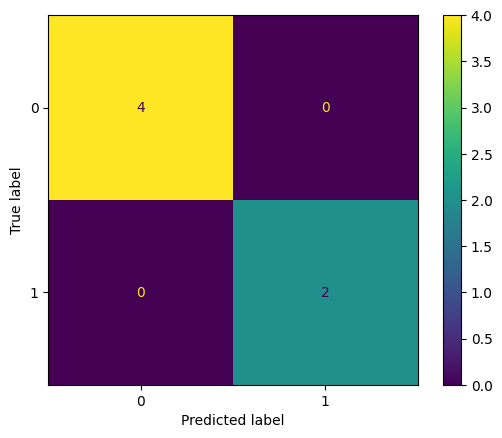

In [18]:
# 9. Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Se aplicó nuevamente un Random Forest, el modelo fue entrenado y evaluado bajo las mismas condiciones que el anterior.

Las métricas también incluyeron:

Accuracy

Precision

F4 Score (para minimizar falsos negativos, es decir, clientes que se irán pero el modelo no predice como tal).

Esto es coherente: retener a un cliente insatisfecho vale más que asumir un pequeño costo al intentar retener a uno que no se iba a ir.

El modelo permite anticipar posibles bajas de clientes, lo cual es estratégico en negocios por suscripción. Permite actuar proactivamente con ofertas, mejoras o contacto directo. Si bien el dataset es limitado, el enfoque metodológico es aplicable a contextos reales.